**Shaked Shimony 318663051**

**part 1: NumPy, Matplotlib/Seaborn**

**Q1:**

**A. The concepts of Covariance and Correlation and their relationship:**

Covariance is a measure of the relationship between variables and correlation is also a measure of the relationship between variables.
The relationship between correlation and covariance, is that correlation is covariance normalized so that the relationship ranges from -1 to 1.

covariance = 1/n * sigma((x-M_x)*(y-M_y))     | where M_x, M_y are the averages of x,y.

correlation = covariance/(σ_x*σ_y)    |where σ_x, σ_y are the standard deviation of x and y.

**B. Load the Iris dataset and use visualization to explore the relationship between the different features:**

First i chose to show the heat map of the correlation of the different variables. You can see in the warm colors the positive correlations between the 2 types of variables and in the cold colors the negative correlations between the 2 types of variables, where of course the greater the absolute value of the correlation, the stronger the relationship between the 2 variables (and thus the color in the table is warmer or colder depending on the type of relationship).
Then I showed the distribution of the different variables with each other using a pair plot, coloring each species in a different color, to see the relationship between the variables and the different species.

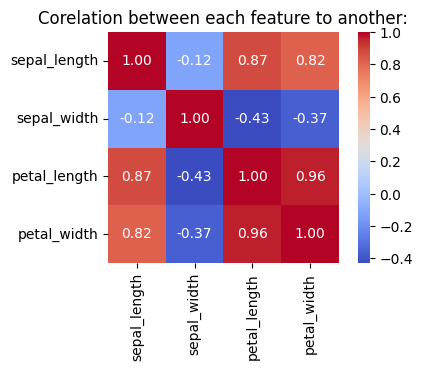

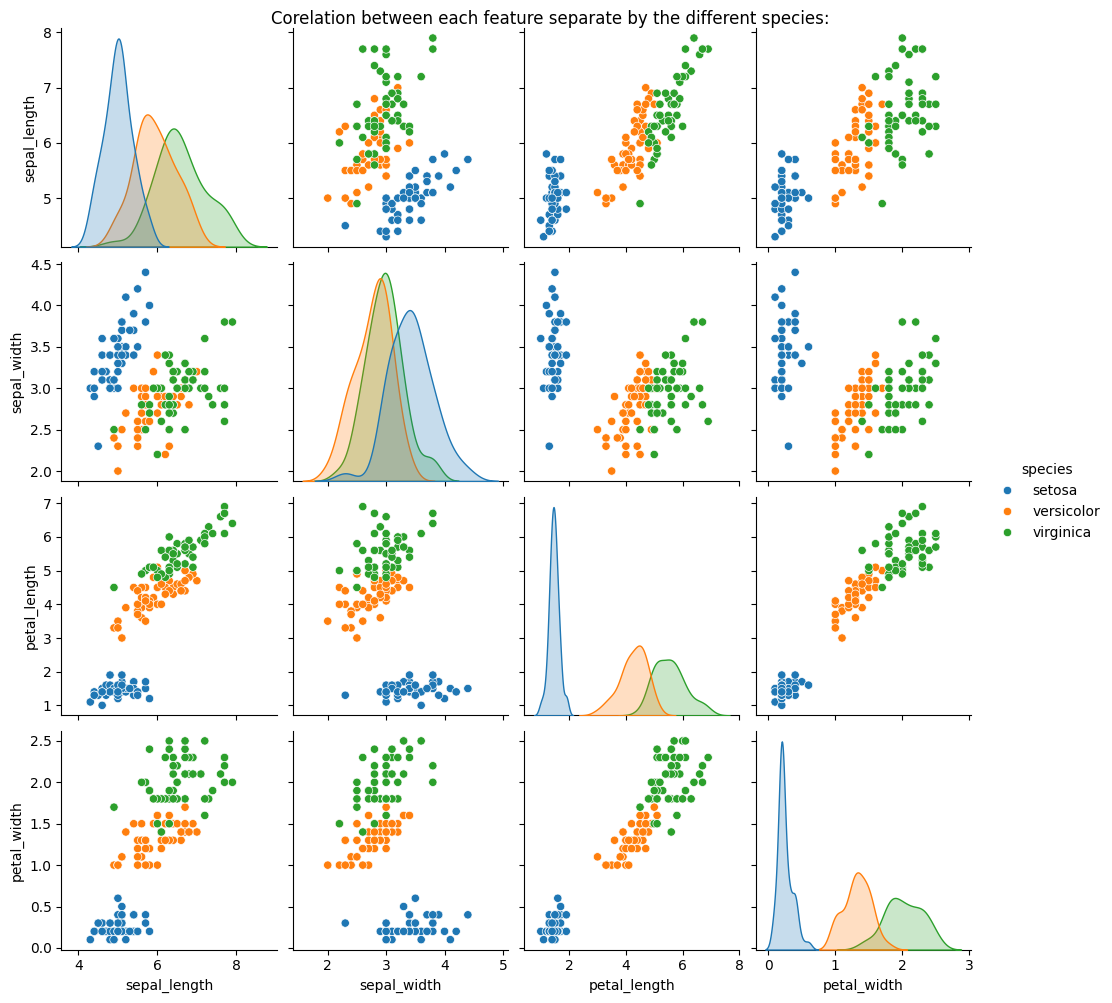

In [2]:
# Import all important libraries (for all the code)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris_dataset = sns.load_dataset("iris") # Load the Iris dataset with seaborn library

# Use visualization to explore the relationship between the different features.
dfnumonly = iris_dataset.select_dtypes(include=[np.number]) # Take only the numeric variables (not the species)
corrmat = dfnumonly.corr() # corelation between the features
# heat map of the corelation
f, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(corrmat,cmap="coolwarm", square=True, annot=True, fmt='.2f', annot_kws={'size': 10}) # negative corelation will be in cool colors and positice corelation in warm colors
plt.title("Corelation between each feature to another:")
plt.show()

# visualize the coralation between each feature separate by the different species
plot = sns.pairplot(iris_dataset, kind ="scatter",hue='species')
plot.fig.suptitle("Corelation between each feature separate by the different species:", y=1)
plt.show()

**C. Implement the functions a and b: a is a function to calculate the covariance between two variables (calcCov), b is a function to compute the Covariance matrix (covMat):**

In [3]:
def calcCov(x, y):
  """"A function to calculate the covariance between two variables.
  input: two variables (x,y)
  output:covariance between x and y"""
  mu_x = np.mean(x)
  mu_y = np.mean(y)
  cov = np.mean((x - mu_x) * (y - mu_y))
  return cov

def covMat(data):
  """A function to compute the Covariance matrix.
  input: data frame
  output: an n by n covariance matrix, where n is the number of features"""
  try:
    data=data.select_dtypes(include=[np.number]) # take only numbers values
    data = data.to_numpy().transpose() # convert the data to numpy
    mat = []
    for loc in range(len(data)):
      vec = []
      for loc2 in range(len(data)):
        covariance = calcCov(data[loc],data[loc2]) # for all 2 variables in data calculate the covariance
        vec.append(covariance)
      mat.append(vec)
    covariance = np.array(mat) # convert the matrix to an np.array matrix
    return covariance
  except:
    return "please enter a data frame object into this function and try again"

# check if all options of the functions work
print("If it is a data frame object:\n",covMat(iris_dataset),"\n")
print("If it is not a data frame object:\n",covMat(covMat(iris_dataset)))

If it is a data frame object:
 [[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]] 

If it is not a data frame object:
 please enter a data frame object into this function and try again


**D. Compare the results of my function with np.cov function:**

I printed the convolution matrix created as a result of my function and the matrix created as a result of the numpy function. You can see that we got very similar matrices. For the comparison, I calculated the percentage error between each value in these matrices (absolute value of the difference between the matrices divided by one of them). I printed the matrix of the error and I got that there are very small percentage errors between each of the values ​​in the 2 matrices. The percentage errors between each of the values ​​are 0.66666667% error. This means that the matrices are very similar, almost the same.

In [4]:
my_conv = covMat(iris_dataset)
np_conv = np.cov(dfnumonly,rowvar=False)

# Test 1: comparing the results of your function with NumPy's np.cov(data,rowvar=False) using the iris dataset
print("My function result: \n",my_conv,"\n")
print("NumPy's np.cov result: \n",np_conv,"\n")

# Calculating the percentage error of each of the values ​​between the different matrices
print("percentage error of each of the values ​​between the different matrices: \n",np.abs((my_conv-np_conv)/np_conv)*100)

My function result: 
 [[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]] 

NumPy's np.cov result: 
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]] 

percentage error of each of the values ​​between the different matrices: 
 [[0.66666667 0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.66666667 0.66666667]]


**E. Using my covariance function, implement a function to calculate the correlation matrix (corrMat):**

In [5]:
def corrMat(data):
  """ this function use covMat(data) function and return the correlation matrix
  input: data (data frame object)
  output: correlation metrix"""
  try:
    # calculate the STD for each feature
    matstd = [] # the vec of the multiplication between std of x and std of y.
    dat=data.select_dtypes(include=[np.number]) # only numbers
    dat = dat.to_numpy().transpose() #convert to numpy
    for loc in range(len(dat)):
      vec = []
      for loc2 in range(len(dat)):
          variance = np.std(dat[loc])*np.std(dat[loc2])
          vec.append(variance)
      matstd.append(vec)
    covariance = covMat(data) # covariance using my covariance function
    correlation = covariance/(matstd) # correlation is the covariance divide by the multiplication between the std of x and the std of y
    return correlation
  except:
    return "please enter a data frame object into this function and try again"

**F. Comparing my correlation function with the np.corrcoef function:**

I printed the correlation matrix created as a result of my function and the matrix created as a result of the numpy function. You can see that we got the same matrices. For the comparison, I calculated the percentage error between each value in these matrices (absolute value of the difference between the matrices divided by one of them). I printed the matrix of the error and I got percentage errors between each of the values of 0% error, this means that these are the same matrices.

In [6]:
my_corr = corrMat(iris_dataset)
np_corr = np.corrcoef(dfnumonly,rowvar=False)

# Test2: validate my correlation matrix implementation by comparing it with the results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.
print("My function result: \n",my_corr,"\n")
print("NumPy's np.corrcoef result: \n",np_corr,"\n")

# Calculating the percentage error of each of the values ​​between the different matrices
print("percentage error of each of the values ​​between the different matrices: \n",np.abs((my_corr-np_corr)/np_corr)*100)

My function result: 
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]] 

NumPy's np.corrcoef result: 
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]] 

percentage error of each of the values ​​between the different matrices: 
 [[0.00000000e+00 7.08232370e-14 0.00000000e+00 2.71467711e-14]
 [7.08232370e-14 1.11022302e-14 6.47828607e-14 6.06470575e-14]
 [0.00000000e+00 5.18262886e-14 1.11022302e-14 1.15304069e-14]
 [2.71467711e-14 7.58088219e-14 1.15304069e-14 1.11022302e-14]]


**G. Use visualizations to communicate the tests results:**

I used a heat map to show the results of the tests. The matrices are represented in purple and the difference matrices between them are represented in red. With the covariance test represented in the top 3 matrices and the correlation in the bottom 3. You can see that the purple heat maps in each of the tests look the same. You can also see that the difference matrix between them is the zero matrix.

Text(0.5, 1.0, 'Differences between the 2 correlation functions:')

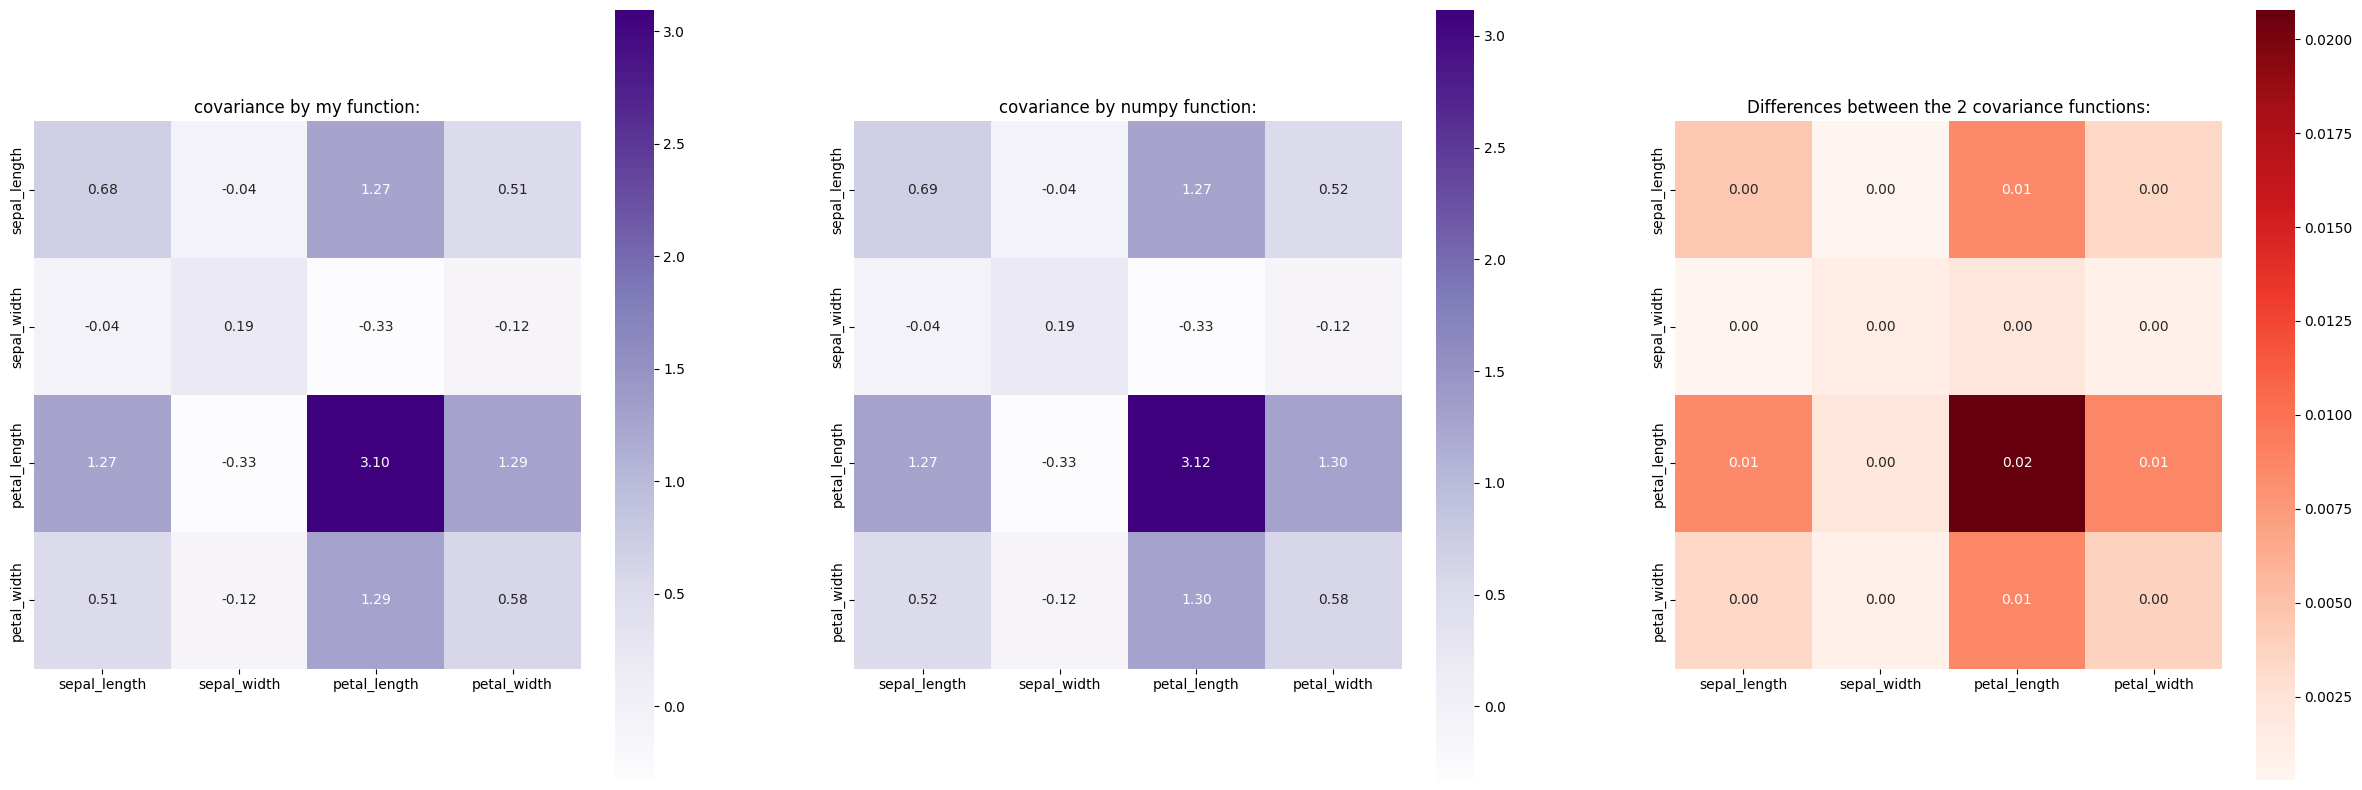

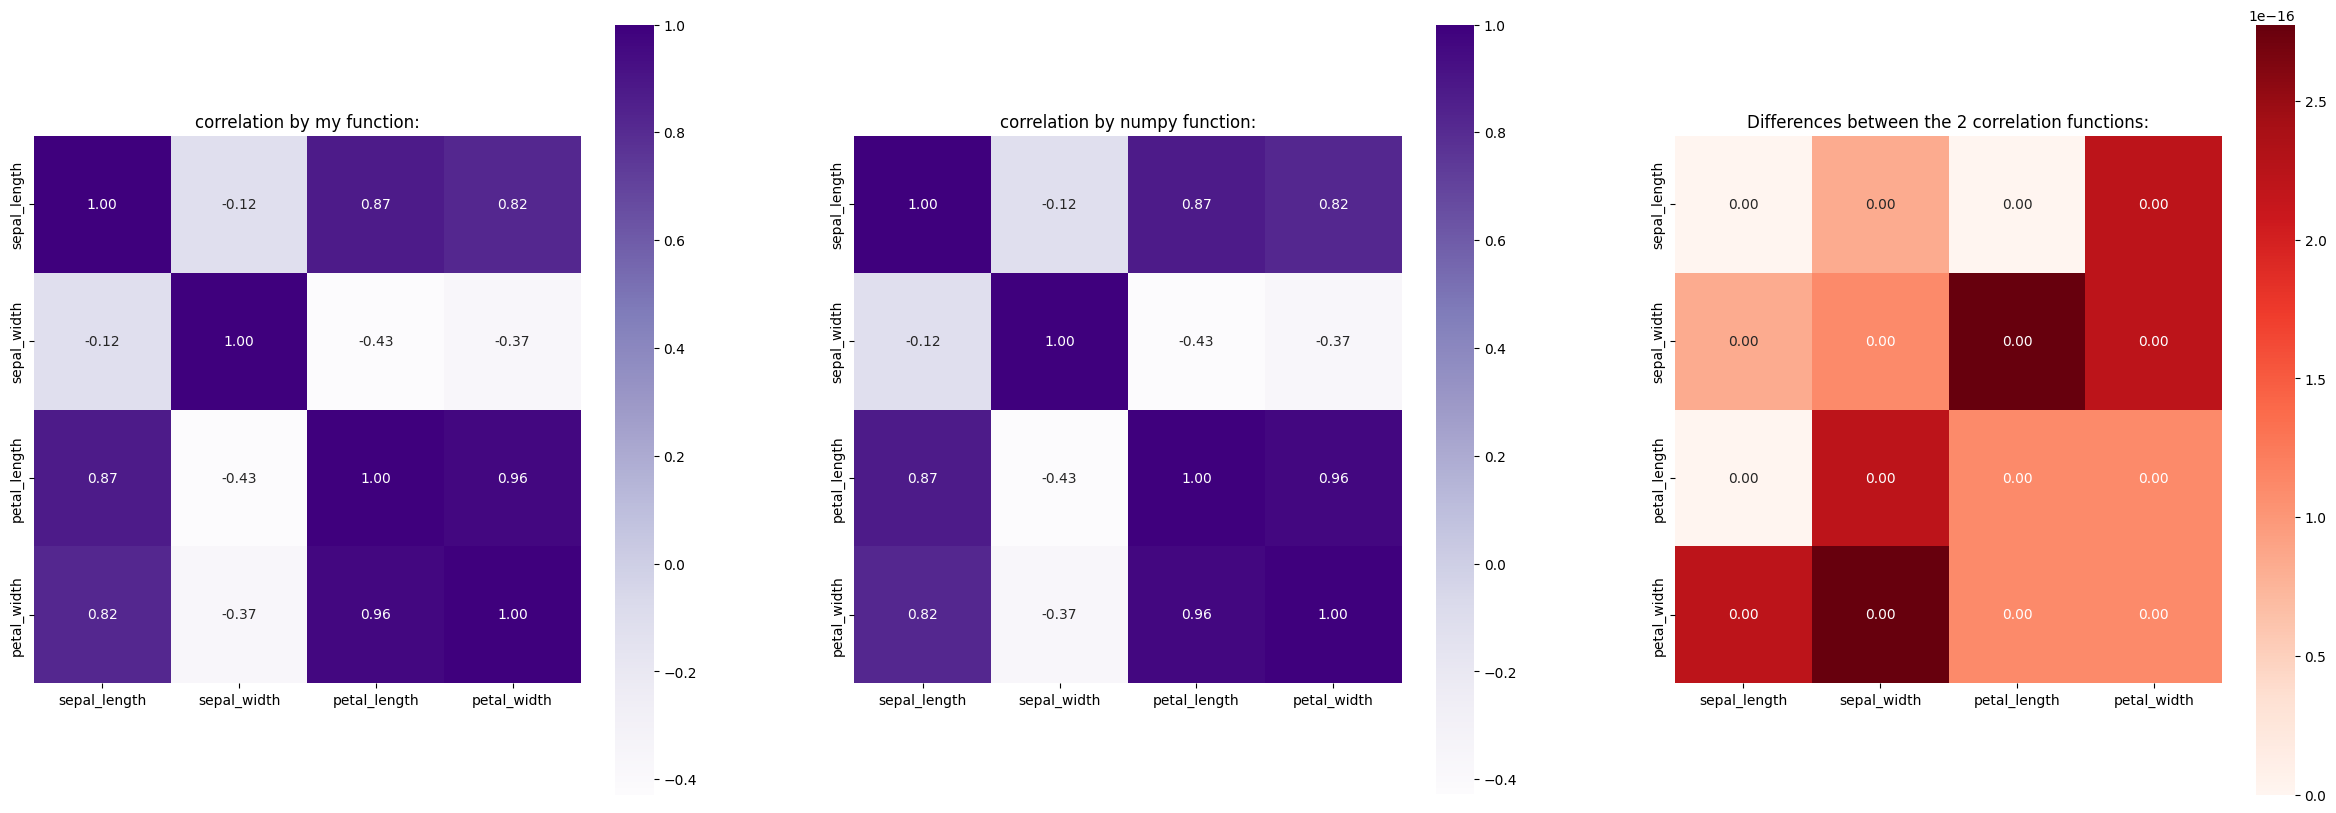

In [7]:
diffcov = np.abs(my_conv-np_conv) # the difference between the 2 convolation matrix
diffcorr = np.abs(my_corr-np_corr) # the difference between the 2 corelation matrix

# draw the 2 convolation metrices as heatmaps (purple) and the matrix of the difference between them (red)
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
sns.heatmap(my_conv,cmap="Purples", square=True, annot=True, fmt='.2f', annot_kws={'size': 10},ax=axes[0],cbar=True,xticklabels=dfnumonly.columns, yticklabels=dfnumonly.columns)
axes[0].set_title("covariance by my function:")
sns.heatmap(np_conv,cmap="Purples", square=True, annot=True, fmt='.2f', annot_kws={'size': 10},ax=axes[1],cbar=True,xticklabels=dfnumonly.columns, yticklabels=dfnumonly.columns)
axes[1].set_title("covariance by numpy function:")
sns.heatmap(diffcov,cmap="Reds", square=True, annot=True, fmt='.2f', annot_kws={'size': 10},ax=axes[2],cbar=True,xticklabels=dfnumonly.columns, yticklabels=dfnumonly.columns)
axes[2].set_title("Differences between the 2 covariance functions:")

# draw the 2 coralation metrices as heatmaps (purple) and the matrix of the difference between them (red)
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
sns.heatmap(my_corr,cmap="Purples", square=True, annot=True, fmt='.2f', annot_kws={'size': 10},ax=axes[0],cbar=True,xticklabels=dfnumonly.columns, yticklabels=dfnumonly.columns)
axes[0].set_title("correlation by my function:")
sns.heatmap(np_corr,cmap="Purples", square=True, annot=True, fmt='.2f', annot_kws={'size': 10},ax=axes[1],cbar=True,xticklabels=dfnumonly.columns, yticklabels=dfnumonly.columns)
axes[1].set_title("correlation by numpy function:")
sns.heatmap(diffcorr,cmap="Reds", square=True, annot=True, fmt='.2f', annot_kws={'size': 10},ax=axes[2],cbar=True,xticklabels=dfnumonly.columns, yticklabels=dfnumonly.columns)
axes[2].set_title("Differences between the 2 correlation functions:")

**Part 2 - NumPy, Pandas, MatPlotLib/Seaborn/Plotly:**

**Q2:**

**Plot the price of all the laptops:**

In [8]:
import pandas as pd
import plotly.express as px

dataset = pd.read_csv("laptop_price - dataset.csv") # load the data
# scatter plot, price of all the products (leptops) in each company
fig = px.scatter(
    dataset,
    x="Product",
    y="Price (Euro)",
    size="Price (Euro)",
    color="Company",
    title="Distribution of prices for every product in each company",
    labels={"Product": "Product", "Price (Euro)": "Price (Euro)"},width=1000,
  height=1000
)
fig.update_layout(xaxis=dict(title="Product"),
                  yaxis=dict(title="Price (Euro)"))
fig.show()

**Which company has on average the most expensive laptop? What is the average laptop price for each company?**

By calculation and also by a visual graph illustrating the answer, we obtained that Razer is the company that has the most expensive laptop on average.

In [9]:
prices =dataset.groupby('Company')['Price (Euro)'].mean() # mean of the prices group by company

# find the company that have the most expensive laptop and print the answer
max_price = prices.max()
company_with_max_price = prices[prices == max_price].index[0]
print(company_with_max_price,"is the company that have on average the most expensive laptops.") # print the most expensive company

# plot of the average prices for each company
fig = px.bar(
    prices,
    x=prices.index,
    y=prices.values,
    title="Average price for each company",
    labels={"x": "Company", "y": "Average Price (Euro)"}
)
fig.update_layout(xaxis=dict(title="Company"),
                  yaxis=dict(title="Average Price (Euro)"))
fig.show()

# print the average laptop price for each company
print("The average laptop price for each company:\n",prices);


Razer is the company that have on average the most expensive laptops.


The average laptop price for each company:
 Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64


**Find the different types of Operating systems present in the data:**

The different types are: macOS, No OS, Windows 10, Linux, Android, Chrome OS, Windows 7.

In [10]:
# show the different oparation systems by graphing the count of this operation systems in the dataset.

# remapping the operating systems for fix the problem
os_mapping = {
    "Windows 10": "Windows 10",
    "Windows 7": "Windows 7",
    "Windows 10 S": "Windows 10",
    "Linux": "Linux",
    "macOS": "macOS",
    "No OS": "No OS",
    "Mac OS X": "macOS",
    "Chrome OS": "Chrome OS",
    "Android": "Android"}

dataset['OpSys'] = dataset['OpSys'].map(os_mapping) # fix

# plot the operating systems in the data after the fix
fig = px.bar(
    dataset["OpSys"].value_counts(),
    x=dataset["OpSys"].value_counts().index,
    y=dataset["OpSys"].value_counts().values,
    title="The operating systems in the data",
    labels={"x": "operating system", "y": "Count"}
)
fig.update_layout(xaxis=dict(title="operating system"),
                  yaxis=dict(title="Count"))
fig.show()

# print the unique operating systems in the data after the fix
print("The operating system in the data:\n",dataset["OpSys"].unique())

The operating system in the data:
 ['macOS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']


**Plot for each of the operating system types the distribution of the prices:**

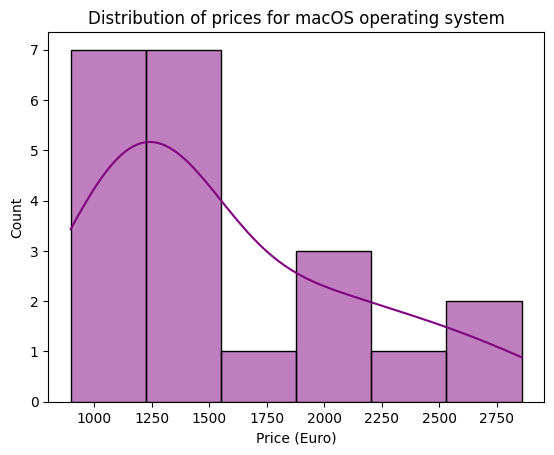

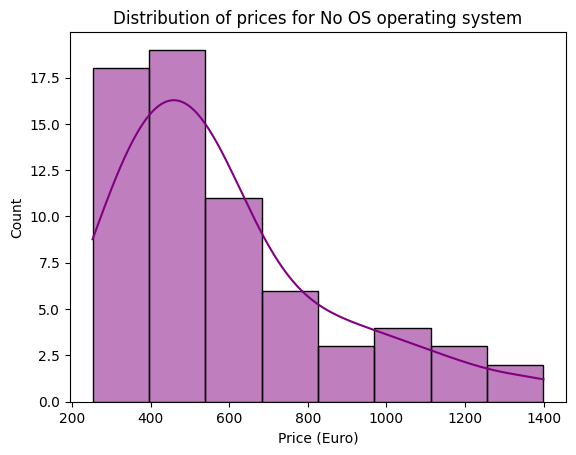

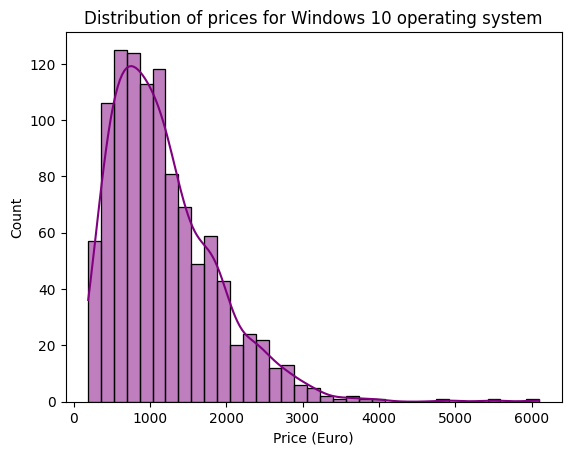

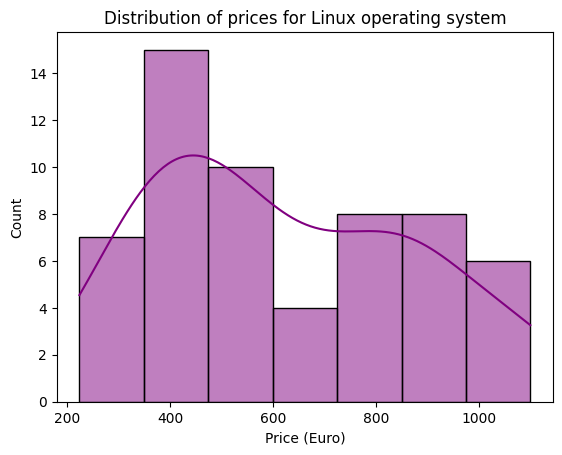

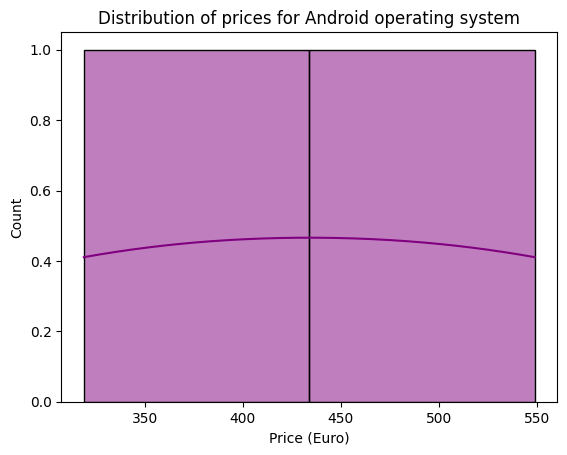

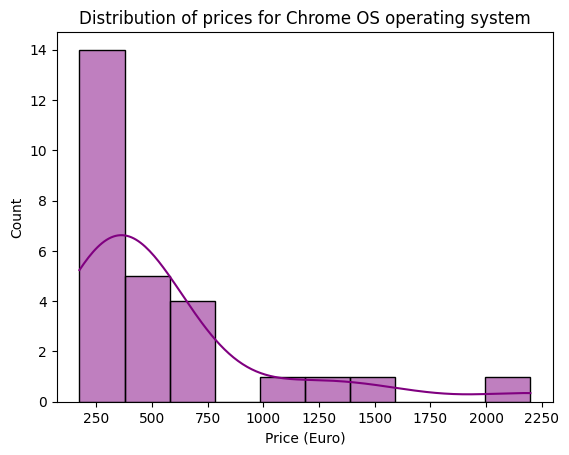

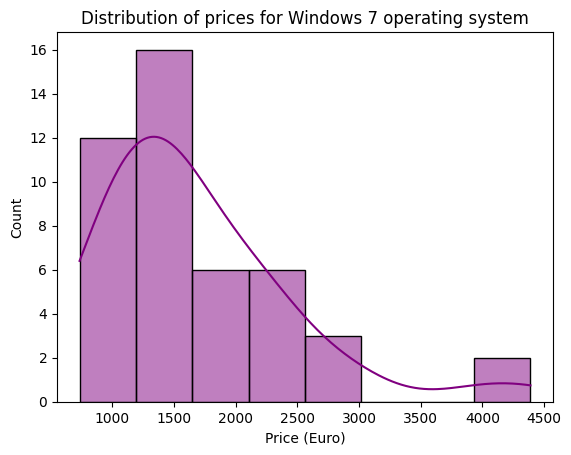

In [11]:
# create an dictionary, keys are the different os and values are the prices.
prices_os={}
for os in dataset["OpSys"]:
  if os not in prices_os:
    prices_os[os] = [dataset[dataset["OpSys"]==os]["Price (Euro)"]]
  else:
    prices_os[os].append(dataset[dataset["OpSys"]==os]["Price (Euro)"])

# convert every value in the dictionary from list to pandas object
for os in prices_os:
  prices_os[os] = pd.Series(prices_os[os][0])
# create hist distribusion for heach os
for key in prices_os.keys():
  sns.histplot(prices_os[key], kde=True,color="purple")
  title = "Distribution of prices for " + key + " operating system"
  plt.title(title)
  plt.xlabel("Price (Euro)")
  plt.ylabel("Count")
  plt.show()

For some analyses I will do later, I created a function that takes 2 variables, calculates the correlation between them and creates a graph that shows both the distribution of the variables together (using a scatter plot) and a correlation line between them. In addition, the function prints the strength of the relationship between the variables and whether the relationship between them is positive or negative.
The function:

In [12]:
def Two_variables_correlation(x, y):
  """
  A function to plot the correlation coefficient between two variables.
  input: two variables (x,y)

  The function will plot and print the correlation coefficient between the two variables
  """
  plt.subplots(figsize=(10, 6))
  message = "The relationship between "+ x + " and " + y
  plt.scatter(dataset[x],dataset[y],color="purple",label=message)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(message)
  plt.grid()

  # calculate the correlation coefficient
  corr = np.corrcoef(dataset[x], dataset[y])[0, 1]
  #calculate linear regression
  slope, intercept = np.polyfit(dataset[x], dataset[y], 1) # 1 indicates a linear fit

  # calculate the values for the line
  line = slope * dataset[x] + intercept
  plt.plot(dataset[x],line,color="purple",label="The linear regression line")
  plt.legend(loc="lower right")
  plt.show()

  # print the result depending on the type of relathionship between the RAM and the price
  print("Correlation coefficient between "+x+" and "+y+": ", corr)
  if corr < 0:
    print("The relationship between "+x+" and "+y+" is negative.\n\n")
  elif corr == 0:
    print("There is no relationship between "+x+" and "+y+".\n\n")
  else:
    print("The relationship between "+x+" and "+y+" is positive.\n\n")

**What is the relationship between RAM and computer price?**

There is a possitive relationship between them, when the correlation coefficient is 0.7402865271622688 as you can see in the folowing plot and print:

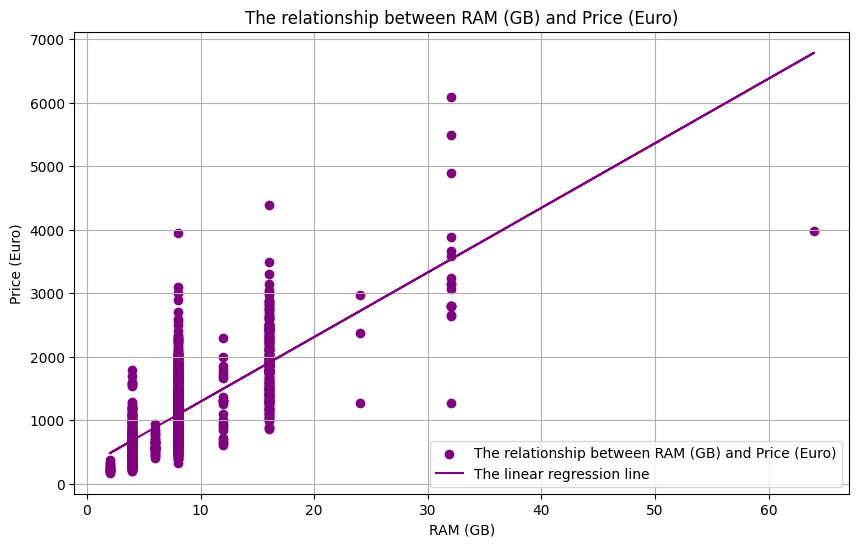

Correlation coefficient between RAM (GB) and Price (Euro):  0.7402865271622688
The relationship between RAM (GB) and Price (Euro) is positive.




In [13]:
Two_variables_correlation("RAM (GB)","Price (Euro)") # plot and print the correlation coefficient between RAM and computer price

**Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory":**

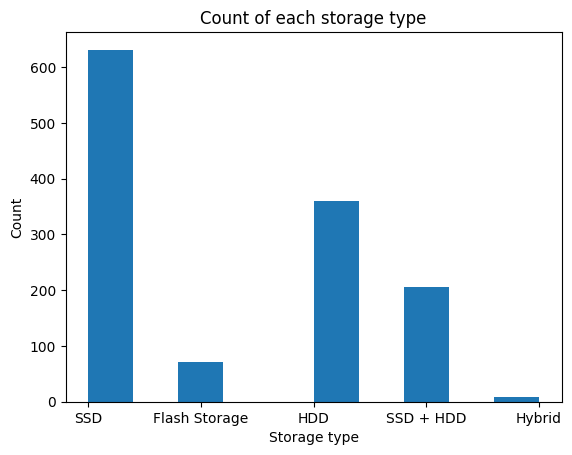

The new column (storage type):
 0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1270              SSD
1271              SSD
1272    Flash Storage
1273              HDD
1274              HDD
Name: Storage type, Length: 1275, dtype: object

The unique values of storage type are:
 ['SSD' 'Flash Storage' 'HDD' 'SSD + HDD' 'Hybrid']


In [14]:
# create a new column "storage type" that contain only the storage type from the memory column
dataset['Storage type'] = dataset['Memory'].str.replace('SSD +', 'Together') # when there is ssd and hdd together than replace it to together string
dataset['Storage type'] = dataset['Storage type'].str.extract('(Together|SSD|HDD|Flash Storage|Hybrid)') # extracting the Storage type from Memory
dataset['Storage type'] = dataset['Storage type'].str.replace('Together',"SSD + HDD") # when there is together string replace it by "SSD + HDD"

# plot the count of each storage type
plt.hist(dataset["Storage type"])
plt.title("Count of each storage type")
plt.xlabel("Storage type")
plt.ylabel("Count")
plt.show()

# show the new column
print("The new column (storage type):\n",dataset["Storage type"])
# show the unique values of the new column
print("\nThe unique values of storage type are:\n",dataset["Storage type"].unique())


**Q3:**

**My list of questions and suggested analyses:**

**Question 1:** How does the number of pixels that a screen can display vary depending on the size of the screen?

**suggested analyse 1:** I will take the ScreenResolution variable and display a new column that will represent the number of pixels that the computer can represent, in each row in the column there will be the multiplication between the number of pixels in width and the number of pixels in height specified in the ScreenResolution variable. Then I will correlate the screen size and the number of pixels that the screen can represent, I will show a scatter plot that shows for each of the computers what its size and number of pixels are and I will fit a regression line between them (and draw it inside the scatter plot).

**Question 2:** How many of each type of computer (type name) are there for each company?

**suggested analyse 2:** I will make a scatter plot where the x-axis is the type of computer and the y-axis is the number of them, with each company having its own scatter and I will draw all the plots on the same graph with a legend appropriate for each company.

**Question 3:** What is the cpu frequency for each cpu company and for each cpu type separately?

**suggested analyse 3:** I will make a scatter plot of cpu company on one axis and cpu type on the second axis, where the size of the points will depend on the cpu frequency.

**Question 4:** What is the relationship between the weight of the computer and the size of the screen?

**suggested analyse 4:** I will make a correlation between the size of the screen and the weight of the computer, I will present a scatter graph of each of the data and on it I will draw the regression line that will represent the correlation with.

**Question 5:** How does the price vary depending on the size of the screen?

**suggested analyse 5:** I will make a correlation between the size of the screen and the price, I will present a scatter graph of each of the data and on it I will draw the regression line that will represent the correlation with.

**Question 6:** How does the price vary depending on the computer's memory (memory size and memory type separately)?

**suggested analyse 6:** I will create a new column with only the memory size (we already created a column with the memory type earlier) and then I will make a scatter plot with one axis representing the memory size and the second axis representing the price of the computer, I will change the color of the points according to the different memory types.

**Question 7:** Which product is the most expensive (On average)?

**suggested analyse 7:** I will average the price of each product individually and check which average price is the highest (for which product). I will print the answer and make a visualization graph that shows the average price for each product individually (a bar chart where the y-axis is the average price of the product and the x-axis is the products).

**I selected questions 1 and 6 from my list and implement:** 

**Question 1:**

I received a correlation of -0.08360198708213161 between the pixels and the size of the screen, meaning that the relationship between them is negative but very moderate.

The implementation:

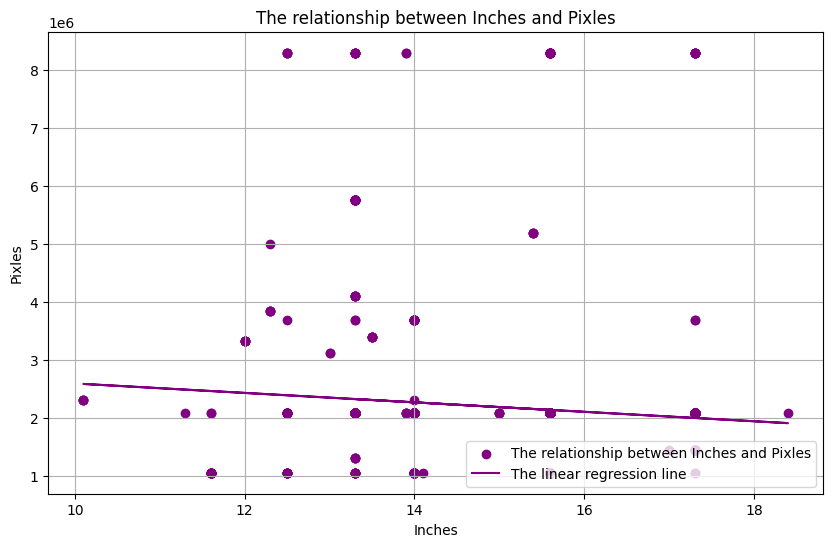

Correlation coefficient between Inches and Pixles:  -0.0836019870821317
The relationship between Inches and Pixles is negative.




In [15]:
# 1: How does the number of pixels that a screen can display vary depending on the size of the screen?

# create a pixles colums
dataset["Pixles2"] = dataset["ScreenResolution"].str.split('x').str[-1]
dataset["Pixles1"] = dataset["ScreenResolution"].str.split('x').str[0]
dataset["Pixles1"] = dataset["Pixles1"].str.split(' ').str[-1]
# The pixles is the multiplication betweem the amount of pixles in a Width and in a length of the computer
dataset["Pixles"] = dataset["Pixles1"].astype(int)*dataset["Pixles2"].astype(int)

# Analyze:
Two_variables_correlation("Inches","Pixles") # plot and print the correlation coefficient between the two variables

**Question 6:**

I received a correlation of 0.15966723612819222, meaning that the relationship between the variables is positive.
Then I wanted to see the different distributions according to each type of storage, and you can see in the second chart (which represents these distributions) that except for hybrid storage (which has a small sample) whose price decreases as the storage size increases, all other types of storage show an increase in price as the storage size increases, while some types of storage show a sharper increase in the price of the computer depending on the storage size, and some show a moderate increase.

The implementation:

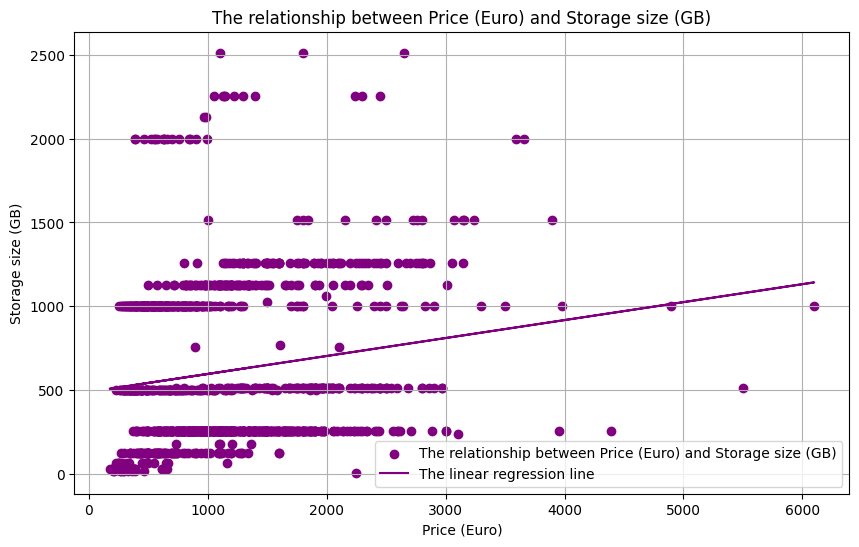

Correlation coefficient between Price (Euro) and Storage size (GB):  0.15966723612819228
The relationship between Price (Euro) and Storage size (GB) is positive.




In [19]:

# 6 : How does the price vary depending on the computer's memory (memory size and memory type separately)?

# create column of storage size (without the storage type)
dataset["Storage size (GB)"]=dataset["Memory"].replace({'SSD':'','HDD':'','Flash Storage':'','Hybrid':''},regex=True)
# remove the 'GB' string and replace the 'TB string by *1000, for convert from TB to GB
dataset["Storage size (GB)"]=dataset["Storage size (GB)"].replace({'GB':'','TB':'*1000'},regex=True)
# remove empty spaces
dataset["Storage size (GB)"] = dataset["Storage size (GB)"].str.replace(r'\s+', '', regex=True)
# do the math that needed for getting the total GB for each laptop
dataset["Storage size (GB)"] = dataset["Storage size (GB)"].apply(lambda x: eval(x) if '*' or '+' in x else int(x))
# convert to int object
dataset["Storage size (GB)"] = dataset["Storage size (GB)"].astype(int)

# Analyze
Two_variables_correlation("Price (Euro)","Storage size (GB)") # corelation between peice and storage size

# scatter of the relationship between storage size and price for each storage type separetly
fig = px.scatter(
    dataset,
    x="Storage size (GB)",
    y="Price (Euro)",
    trendline="ols",
    color="Storage type",
    title="Relationship between storage size and price for each storage type separetly:",
    labels={"Storage size (GB)": "Storage size (GB)", "Price (Euro)": "Price (Euro)"},
    height=1000,
    width=1500)
fig.show()